In [62]:
%%capture
# install packages

!pip install pandas openpyxl
!pip install scikit-learn
!pip install seaborn


import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [51]:
combine_py = pd.read_csv("CompleteData.xlsx - Sheet1-2.csv")

combine_py = combine_py.astype(
    {
        "HT": float,
        "WT": float,
        "40": float,
        "BJ": float,
        "5 10 5": float,
        "FLEX": float,
        "GPA": float,
        "Vert": float
    }
)

In [64]:
combine_knn_py_file = "CompleteData.xlsx - Sheet1-2.csv"



col_impute = ["HT", "WT", "40", "BJ", "5 10 5", "FLEX", "GPA", "Vert"]


if not os.path.isfile(combine_knn_py_file):
    combine_knn_py = combine_py.drop(col_impute, axis=1)
    imputer = KNNImputer(n_neighbors=10)
    knn_out_py = imputer.fit_transform(combine_py[col_impute])
    knn_out_py = pd.DataFrame(knn_out_py)
    knn_out_py.columns = col_impute
    combine_knn_py = pd.concat([combine_knn_py, knn_out_py], axis=1)
    combine_knn_py.to_csv(combine_knn_py_file)
else:
    combine_knn_py = pd.read_csv(combine_knn_py_file)

In [45]:
combine_knn_py = pd.read_csv(combine_knn_py_file)

combine_knn_py.describe()

,Year,HT,WT,BJ,5 10 5,FLEX,GPA,Vert
count,376.000000,492.000000,501.000000,513.000000,485.000000,486.000000,372.000000,105.000000
mean,2025.279255,69.271341,199.399601,11.556706,4.749062,3.298354,4.316589,28.012810
std,0.644315,12.349833,38.736629,17.616373,0.405256,1.137676,6.475878,3.856541
min,2025.000000,0.000000,4.500000,0.000000,2.460000,1.000000,2.500000,17.850000
25%,2025.000000,70.000000,174.000000,7.830000,4.550000,3.000000,3.700000,25.000000
50%,2025.000000,72.000000,192.000000,8.580000,4.720000,3.000000,3.900000,27.900000
75%,2025.000000,73.500000,216.000000,8.950000,4.950000,4.000000,4.000000,30.400000
max,2028.000000,77.000000,359.000000,122.000000,6.770000,5.000000,93.700000,37.950000


[0.97301288 0.02698712]


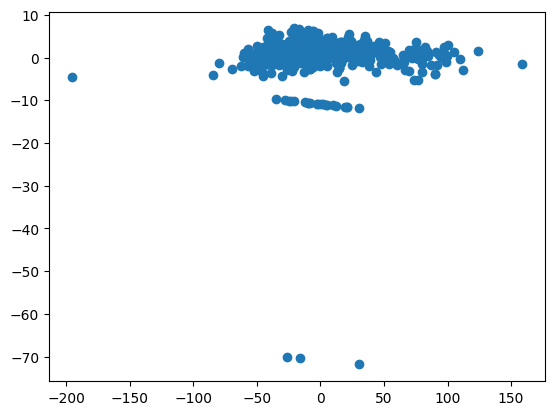

In [65]:
pca_wt_ht = PCA(svd_solver="full")
wt_ht_py = combine_py[["WT", "HT"]].query("WT.notnull() & HT.notnull()").copy()
pca_fit_wt_ht_py = pca_wt_ht.fit_transform(wt_ht_py)

print(pca_wt_ht.explained_variance_ratio_)

plt.plot(pca_fit_wt_ht_py[:, 0], pca_fit_wt_ht_py[:, 1], "o")
plt.show()

pca_wt_ht.components_

scaled_combine_knn_py = (
    combine_knn_py[col_impute] - combine_knn_py[col_impute].mean()
) / combine_knn_py[col_impute].std()


In [70]:
feature_cols = ["HT","WT","40","BJ","5 10 5","FLEX","GPA","Vert"]
feature_cols = [c for c in feature_cols if c in combine_py.columns]

combine_py[feature_cols] = (
    combine_py[feature_cols]
      .replace(["#DIV/0!","#N/A","N/A","NA","--",""], np.nan)
)

for c in feature_cols:
    combine_py[c] = (
        combine_py[c]
        .astype(str)
        .str.replace(r"[^0-9\.\-eE]", "", regex=True)
        .replace({"": np.nan, ".": np.nan, "-": np.nan})
    )
    combine_py[c] = pd.to_numeric(combine_py[c], errors="coerce")

In [72]:
imputer = KNNImputer(n_neighbors=10)

X_imputed = imputer.fit_transform(combine_py[feature_cols])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print("Any NaN after impute+scale?", np.isnan(X_scaled).any())
print("Shape:", X_scaled.shape)

Any NaN after impute+scale? False
Shape: (543, 8)


In [ ]:
pca = PCA(svd_solver="full")
X_pca = pca.fit_transform(X_scaled)



In [71]:
pca = PCA(svd_solver="full")
pca_fit_py = pca.fit_transform(scaled_combine_knn_py)

rotation = pd.DataFrame(pca.components_, index=col_impute)
print(rotation)

print(pca.explained_variance_)

pca_percent_py = pca.explained_variance_ratio_.round(4) * 100
print(pca_percent_py)

pca_fit_py = pd.DataFrame(pca_fit_py)
pca_fit_py.columns = ["PC" + str(x + 1) for x in range(len(pca_fit_py.columns))]
combine_knn_py = pd.concat([combine_knn_py, pca_fit_py], axis=1)


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [36]:
k_means_fit_py = \
    kmeans(combine_knn_py[["PC1", "PC2"]], 6, seed = 1234)

KeyError: "None of [Index(['PC1', 'PC2'], dtype='object')] are in the [columns]"